In [1]:
%matplotlib notebook

In [2]:
#Importing the dependencies and the libraries required

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import sem

In [3]:
# Read csv file
csv_path="data/rs.csv"
data=pd.read_csv(csv_path)
data.head()

,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid
0,2018-09-18 00:00:00,NaN,Darling Point,Sydney,NSW,-33.869565,151.241317,3,unit,NSW1221,NSW180
1,2018-09-24 00:00:00,NaN,Darling Point,Sydney,NSW,-33.872179,151.239726,3,unit,NSW1221,NSW180
2,2018-09-26 00:00:00,1730000.0,Darling Point,Sydney,NSW,-33.868386,151.237471,2,unit,NSW1221,NSW180
3,2018-09-26 00:00:00,1928000.0,Darling Point,Sydney,NSW,-33.875465,151.236280,3,unit,NSW1221,NSW180
4,2018-10-02 00:00:00,1475000.0,Darling Point,Sydney,NSW,-33.875734,151.233575,3,unit,NSW1221,NSW180


In [4]:
# Check the number of columns and datatypes in each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320334 entries, 0 to 320333
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date_sold      320334 non-null  object 
 1   price          257826 non-null  float64
 2   suburb         320334 non-null  object 
 3   city_name      320334 non-null  object 
 4   state          320334 non-null  object 
 5   lat            320256 non-null  float64
 6   lon            320256 non-null  float64
 7   bedrooms       320334 non-null  int64  
 8   property_type  320334 non-null  object 
 9   loc_pid        320334 non-null  object 
 10  lga_pid        320334 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 26.9+ MB


# DATA CLEANUP

In [5]:
# Drop the rows with any null values
data.dropna(how = 'any', inplace = True)
data

,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid
2,2018-09-26 00:00:00,1730000.0,Darling Point,Sydney,NSW,-33.868386,151.237471,2,unit,NSW1221,NSW180
3,2018-09-26 00:00:00,1928000.0,Darling Point,Sydney,NSW,-33.875465,151.236280,3,unit,NSW1221,NSW180
4,2018-10-02 00:00:00,1475000.0,Darling Point,Sydney,NSW,-33.875734,151.233575,3,unit,NSW1221,NSW180
5,2018-10-12 00:00:00,960000.0,Darling Point,Sydney,NSW,-33.869516,151.237239,2,unit,NSW1221,NSW180
7,2018-10-25 00:00:00,1615000.0,Darling Point,Sydney,NSW,-33.876785,151.233727,2,unit,NSW1221,NSW180
...,...,...,...,...,...,...,...,...,...,...,...
320328,2019-01-11 00:00:00,439900.0,Taylor,Canberra,ACT,-35.152423,149.103550,2,townhouse,ACT934,ACT
320330,2019-09-10 00:00:00,549900.0,Taylor,Canberra,ACT,-35.151968,149.107229,3,townhouse,ACT934,ACT
320331,2019-09-10 00:00:00,499900.0,Taylor,Canberra,ACT,-35.151968,149.107229,3,townhouse,ACT934,ACT
320332,2020-03-10 00:00:00,434000.0,Taylor,Canberra,ACT,-35.152617,149.103578,3,townhouse,ACT934,ACT


In [6]:
# Convert date & time stamp in the first column (date_sold column) to just show the date
data['date_sold']=pd.to_datetime(data.date_sold)
data

,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid
2,2018-09-26,1730000.0,Darling Point,Sydney,NSW,-33.868386,151.237471,2,unit,NSW1221,NSW180
3,2018-09-26,1928000.0,Darling Point,Sydney,NSW,-33.875465,151.236280,3,unit,NSW1221,NSW180
4,2018-10-02,1475000.0,Darling Point,Sydney,NSW,-33.875734,151.233575,3,unit,NSW1221,NSW180
5,2018-10-12,960000.0,Darling Point,Sydney,NSW,-33.869516,151.237239,2,unit,NSW1221,NSW180
7,2018-10-25,1615000.0,Darling Point,Sydney,NSW,-33.876785,151.233727,2,unit,NSW1221,NSW180
...,...,...,...,...,...,...,...,...,...,...,...
320328,2019-01-11,439900.0,Taylor,Canberra,ACT,-35.152423,149.103550,2,townhouse,ACT934,ACT
320330,2019-09-10,549900.0,Taylor,Canberra,ACT,-35.151968,149.107229,3,townhouse,ACT934,ACT
320331,2019-09-10,499900.0,Taylor,Canberra,ACT,-35.151968,149.107229,3,townhouse,ACT934,ACT
320332,2020-03-10,434000.0,Taylor,Canberra,ACT,-35.152617,149.103578,3,townhouse,ACT934,ACT


# SCATTER PLOT 3-BR properties location by price (France G.)

<IPython.core.display.Javascript object>


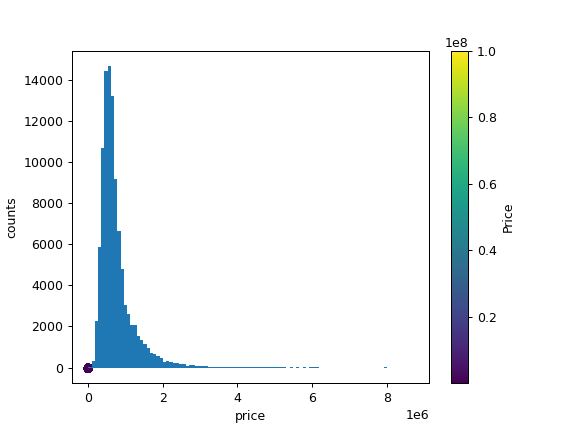

In [7]:
plt.scatter(data['lon'],data['lat'],c=data['price'])
clb = plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb.set_label("Price")
plt.show()

# HISTOGRAM 3-BR properties (France G.)

In [8]:
br_price = data[['bedrooms', 'price']]
threebr_price = br_price.loc[br_price['bedrooms'] == 3, :]
threebr_price

,bedrooms,price
3,3,1928000.0
4,3,1475000.0
8,3,3200000.0
9,3,2305000.0
10,3,2350000.0
...,...,...
320323,3,507000.0
320324,3,497000.0
320330,3,549900.0
320331,3,499900.0


In [9]:
# Determine which measure of centraltendency is the most appropriate and get a picture of the price data in a histogram
plt.hist(threebr_price['price'], bins=100)
plt.xlabel('price')
plt.ylabel('counts')
plt.show()
print('Mean: ' + str(threebr_price['price'].mean()))
print('Median: ' + str(threebr_price['price'].median()))
print('Mode: ' + str(threebr_price['price'].mode()))
print(sts.normaltest(threebr_price['price'].sample(10000)))

Mean: 753507.4226827422
Median: 624000.0
Mode: 0    600000.0
dtype: float64
NormaltestResult(statistic=7526.816192095411, pvalue=0.0)


The histogram above does not look like it's normally distributed, with P-value < 0.05. The p-value =0.0 also means that it is a non-normal data.

The curve is positively skewed which means that the median is less than the mean. There are more lower-priced house making the median smaller than the mean, which is being pulled higher by a few higher-priced properties


# QUARTILE CALCULATIONS (France G.)

Determine if there are any potential outliers in the residential properties prices data

In [10]:
onebr_price = br_price.loc[br_price['bedrooms'] == 1, :]
twobr_price = br_price.loc[br_price['bedrooms'] == 2, :]
fourbr_price = br_price.loc[br_price['bedrooms'] == 4, :]
fivebr_price = br_price.loc[br_price['bedrooms'] == 5, :]

1-BR quartile calculations

In [11]:
# 1-BR quartile calculations
quartiles1 = onebr_price['price'].quantile([.25,.5,.75])
lowerq1 = quartiles1[0.25]
upperq1 = quartiles1[0.75]
iqr1 = upperq1-lowerq1

print(f'Lower quartile: {lowerq1}')
print(f'Upper quartile: {upperq1}')
print(f'Inter-Quartile Range: {iqr1}')
print(f'Median: {quartiles1[0.5]}')

lower_bound1 = lowerq1 - (1.5*iqr1)
upper_bound1 = upperq1 + (1.5*iqr1)
print(f"Values below {lower_bound1} could be outliers.")
print(f"Values above {upper_bound1} could be outliers.")

outlier_1price = onebr_price[(onebr_price['price'] < lower_bound1) | (onebr_price['price'] > upper_bound1)]
print('n:' + str(len(outlier_1price)))

Lower quartile: 320000.0
Upper quartile: 600000.0
Inter-Quartile Range: 280000.0
Median: 415000.0
Values below -100000.0 could be outliers.
Values above 1020000.0 could be outliers.
n:315


2-BR quartile calculations

In [12]:
# 2-BR quartile calculations
quartiles2 = twobr_price['price'].quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

print(f'Lower quartile: {lowerq2}')
print(f'Upper quartile: {upperq2}')
print(f'Inter-Quartile Range: {iqr2}')
print(f'Median: {quartiles2[0.5]}')

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Values below {lower_bound2} could be outliers.")
print(f"Values above {upper_bound2} could be outliers.")

outlier_2price = twobr_price[(twobr_price['price'] < lower_bound2) | (twobr_price['price'] > upper_bound2)]
print('n:' + str(len(outlier_2price)))

Lower quartile: 420000.0
Upper quartile: 765000.0
Inter-Quartile Range: 345000.0
Median: 570000.0
Values below -97500.0 could be outliers.
Values above 1282500.0 could be outliers.
n:2756


3-BR quartile calculations

In [13]:
# 3-BR quartile calculations
quartiles = threebr_price['price'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f'Lower quartile: {lowerq}')
print(f'Upper quartile: {upperq}')
print(f'Inter-Quartile Range: {iqr}')
print(f'Median: {quartiles[0.5]}')

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_price = threebr_price[(threebr_price['price'] < lower_bound) | (threebr_price['price'] > upper_bound)]

Lower quartile: 476000.0
Upper quartile: 859558.0
Inter-Quartile Range: 383558.0
Median: 624000.0
Values below -99337.0 could be outliers.
Values above 1434895.0 could be outliers.


4-BR quartile calculations

In [14]:
# 4-BR quartile calculations
quartiles4 = fourbr_price['price'].quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4

print(f'Lower quartile: {lowerq4}')
print(f'Upper quartile: {upperq4}')
print(f'Inter-Quartile Range: {iqr4}')
print(f'Median: {quartiles4[0.5]}')

lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
print(f"Values below {lower_bound4} could be outliers.")
print(f"Values above {upper_bound4} could be outliers.")

outlier_4price = fourbr_price[(fourbr_price['price'] < lower_bound4) | (fourbr_price['price'] > upper_bound4)]
print('n:' + str(len(outlier_4price)))

Lower quartile: 582300.0
Upper quartile: 1070000.0
Inter-Quartile Range: 487700.0
Median: 747000.0
Values below -149250.0 could be outliers.
Values above 1801550.0 could be outliers.
n:5367


5-BR quartile calculations

In [15]:
# 5-BR quartile calculations
quartiles5 = fivebr_price['price'].quantile([.25,.5,.75])
lowerq5 = quartiles5[0.25]
upperq5 = quartiles5[0.75]
iqr5 = upperq5-lowerq5

print(f'Lower quartile: {lowerq5}')
print(f'Upper quartile: {upperq5}')
print(f'Inter-Quartile Range: {iqr5}')
print(f'Median: {quartiles5[0.5]}')

lower_bound5 = lowerq5 - (1.5*iqr5)
upper_bound5 = upperq5 + (1.5*iqr5)
print(f"Values below {lower_bound5} could be outliers.")
print(f"Values above {upper_bound5} could be outliers.")

outlier_5price = fivebr_price[(fivebr_price['price'] < lower_bound5) | (fivebr_price['price'] > upper_bound5)]
print('n:' + str(len(outlier_5price)))

Lower quartile: 775000.0
Upper quartile: 1650000.0
Inter-Quartile Range: 875000.0
Median: 1073250.0
Values below -537500.0 could be outliers.
Values above 2962500.0 could be outliers.
n:1099


Summary quartile calculations

In [17]:
summary_qc = pd.DataFrame({
    'Bedroom': ['1-BR', '2-BR', '3-BR', '4-BR', '5-BR'],
    'Lower quartile': [lowerq1, lowerq2, lowerq, lowerq4, lowerq5],
    'Upper quartile': [upperq1, upperq2, upperq, upperq4, upperq5],
    'IQR': [iqr1, iqr2, iqr, iqr4, iqr5],
    'Median (AUD)': [quartiles1[0.5], quartiles2[0.5], quartiles[0.5], quartiles4[0.5], quartiles5[0.5]],
    'Lower bound': [lower_bound1, lower_bound2, lower_bound, lower_bound4, lower_bound5],
    'Upper bound': [upper_bound1, upper_bound2, upper_bound, upper_bound4, upper_bound5],
    'N': [len(outlier_1price), len(outlier_2price), len(outlier_price), len(outlier_4price), len(outlier_5price)],
})

summary_qc['Lower quartile'] = summary_qc['Lower quartile'].astype(int).map("${:,}".format)
summary_qc['Upper quartile'] = summary_qc['Upper quartile'].astype(int).map("${:,}".format)
summary_qc['IQR'] = summary_qc['IQR'].astype(int).map("${:,}".format)
summary_qc['Median (AUD)'] = summary_qc['Median (AUD)'].astype(int).map("${:,}".format)
summary_qc['Lower bound'] = summary_qc['Lower bound'].astype(int).map("${:,}".format)
summary_qc['Upper bound'] = summary_qc['Upper bound'].astype(int).map("${:,}".format)

summary_qc.set_index('Bedroom')

,Lower quartile,Upper quartile,IQR,Median (AUD),Lower bound,Upper bound,N
Bedroom,,,,,,,
1-BR,"$320,000","$600,000","$280,000","$415,000","$-100,000","$1,020,000",315
2-BR,"$420,000","$765,000","$345,000","$570,000","$-97,500","$1,282,500",2756
3-BR,"$476,000","$859,558","$383,558","$624,000","$-99,337","$1,434,895",7682
4-BR,"$582,300","$1,070,000","$487,700","$747,000","$-149,250","$1,801,550",5367
5-BR,"$775,000","$1,650,000","$875,000","$1,073,250","$-537,500","$2,962,500",1099


# BOX PLOT 3-BR properties (France G.)

<IPython.core.display.Javascript object>


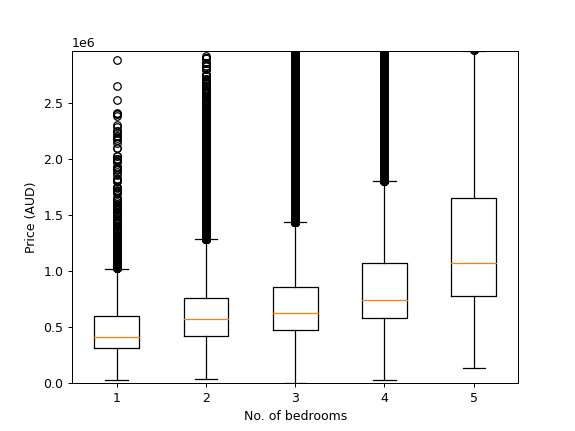

C:\Users\Owner\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Passing arguments to show(), other than passing 'block' by keyword, is deprecated 3.1, and support for it will be removed in 3.3.


In [18]:
# Visualise the spread of the data through box-plot; no. of bedrooms v price 

# Create a dictionary for boxplot
one_price = onebr_price['price'].tolist()
two_price = twobr_price['price'].tolist()
three_price = threebr_price['price'].tolist()
four_price = fourbr_price['price'].tolist()
five_price = fivebr_price['price'].tolist()

br_data = {'1-BR': one_price, '2-BR': two_price, '3-BR': three_price, '4-BR': four_price, '5-BR':five_price}

fig, ax = plt.subplots()
#ax.set_title('Residential Property Prices Sold from Sep 2018 to Apr 2020')
ax.set_xlabel('No. of bedrooms')
ax.set_ylabel('Price (AUD)')
ax.set_ylim([0,upper_bound5])
ax.boxplot(br_data.values())
plt.show(0)

# Standard error on means (France G.)

In [20]:
# Create a bunch of samples, each with sample size of 100
nsamples = 25
div = 100
samples = [threebr_price.sample(div) for x in range(0,nsamples)]


In [21]:
# Calculate means
means = [s.price.mean() for s in samples]
# Calculate standard error on means
sems = [sem(s.price) for s in samples]

<IPython.core.display.Javascript object>


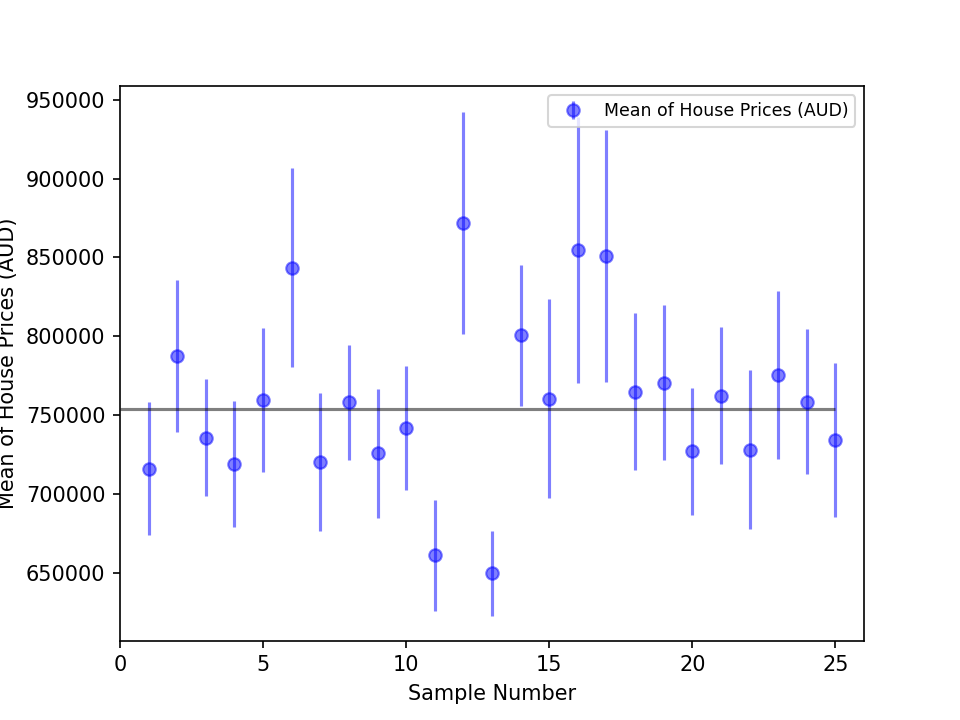

In [22]:
# Plot sample means with error bars
fig, ax = plt.subplots()
ax.errorbar(np.arange(0, len(samples), 1)+1,means, yerr=sems, fmt="o", color="b",
            alpha=0.5, label="Mean of House Prices (AUD)")
ax.set_xlim(0, len(means)+1)
ax.set_xlabel("Sample Number")
ax.set_ylabel("Mean of House Prices (AUD)")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.hlines(threebr_price['price'].mean(), 0, 25, alpha = 0.5 )
plt.show()

In [23]:
# Calculate the range of SEM values
print(f"The range of SEM values in the sample set is {max(sems)-min(sems)}")

The range of SEM values in the sample set is 57365.20179450601


In [24]:
# Determine which sample's mean is closest to the population mean
print(f"The smallest SEM observed was {min(sems)}")
samp_index = sems.index(min(sems))
print(f"The sample with the smallest SEM is sample {samp_index+1}")

The smallest SEM observed was 26986.213954227318
The sample with the smallest SEM is sample 13


In [25]:
# Compare to the population mean
print(f"The mean of the sample 5 is {samples[samp_index].price.mean()}")
print(f"The mean of the population data set is {threebr_price.price.mean()}")

The mean of the sample 5 is 649689.5
The mean of the population data set is 753507.4226827422
